In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary modules first -> Numpy, Pandas and LabelEncoder
import numpy as np
import pandas as pd
# Label Encoder for dealing with categorical labels
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
#Matplot and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Now lets see the files in the data we are dealing with
print(os.listdir())

['NaiveBayes2.csv', 'Foundations of Data Science Final Project Report.pdf', 'logisticRegression1.csv', 'NeuralNetwork.csv', 'logisticRegression2.csv', 'NaiveBayes1.csv', 'application_test.csv', 'application_train.csv', 'FDS Project.ipynb']


In [ ]:
# We need to work our dataset on application_train.csv and application_test.csv . Lets import the data in a dataframe.
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

In [ ]:
# Visualize train data
train_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.

In [ ]:
# There are some NaN in data which indicate missing values. Lets see the test data now.
test_data.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,-18604,-12009,-6116.0,-2027,10.0,1,1,0,1,1,0,Drivers,2.0,2,2,MONDAY,15,0,0,0,0,0,0,Government,...,0.1975,0.2258,0.0116,0.0746,not specified,block of flats,0.2151,Block,No,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-16685,-2580,-10125.0,-241,

In [ ]:
#Test data too contains some missing values which we will have to deal later.
#Lets see shape of both data.
print ("Shape of Training data is ",train_data.shape)
print ("Shape of Testing data is ",test_data.shape)

Shape of Training data is  (307511, 122)
Shape of Testing data is  (48744, 121)


In [ ]:
# We see that target variable is missing from the testing dataset. The target variable is what system needs to predict. 
# Therefore the task needs to be done using a supervised classification algorithm. We have thus established the boundry.
# For this task, I will use logistic Regression , Naive Bayes and a neural network classifier.

In [ ]:
#Since this is a supervised classification task.We need to see distribution of class with respect to the label for our training data.
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

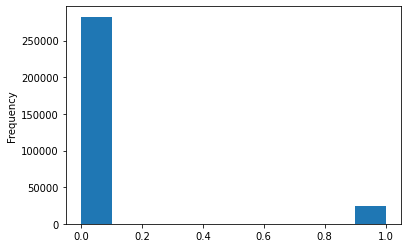

In [ ]:
# We see many traning examples belong 0 (no) and less to 1(yes). Lets visualize it too.
train_data['TARGET'].astype(int).plot.hist();

In [ ]:
# The dataset has high imbalance in classes. Therefore accuracy might be a good metric to evaluate the performance of our trained classifier.
# Lets see datatypes of our features.
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
#Lets see which of features are object
print(train_data.dtypes == 'object')

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool


In [ ]:
# Lets now start dealing with missing values.
train_data.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# Can we do better to find count of null values .
train_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [ ]:
# Can we do more better by making it visualized using a table. For that I define a function like the one on the kaggle kernel followed
# by the professor.
def missing_values_table(df):
    missing_val= df.isnull().sum()
    
    # Percentage of missing values
    
    missing_per = 100 *df.isnull().sum() /len(df)
    
    mis_values_table = pd.concat([missing_val,missing_per],axis=1)
    
    missing_val_table_columns = mis_values_table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values'})
    
    missing_val_table_columns = missing_val_table_columns[
            missing_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
    
    return missing_val_table_columns
    

In [ ]:
# Lets see the missing values visualization for our train_data.
missing_values_table(train_data)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
# Lets check if I drop all Nan rows. How much data are we left to deal with ? 
train_data_modify = train_data

In [ ]:
train_data_modify.shape

(307511, 122)

In [ ]:
train_data_modify=train_data_modify.dropna()

In [ ]:
train_data_modify.shape

(8602, 122)

In [ ]:
# This shows its not better to drop all Nan values. This will significantly decrease our data. Other solution is to drop columns with 
# more missing data.

In [ ]:
missing_values= missing_values_table(train_data)

In [ ]:
missing_values.head(40)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
(missing_values_table(train_data)).head(30)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
train_data.drop(["COMMONAREA_AVG","COMMONAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAPARTMENTS_AVG","FONDKAPREMONT_MODE","LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_MEDI","LIVINGAPARTMENTS_AVG","FLOORSMIN_AVG","FLOORSMIN_MEDI","FLOORSMIN_MODE","YEARS_BUILD_AVG","YEARS_BUILD_MEDI","LANDAREA_MODE","LANDAREA_AVG","LANDAREA_MEDI","BASEMENTAREA_MEDI","BASEMENTAREA_MODE","BASEMENTAREA_AVG","EXT_SOURCE_1","NONLIVINGAREA_MODE","NONLIVINGAREA_AVG","NONLIVINGAREA_MEDI"],axis=1,inplace=True)

In [ ]:
(missing_values_table(train_data)).head(30)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
YEARS_BUILD_MODE,204488,66.5
OWN_CAR_AGE,202929,66.0
ELEVATORS_AVG,163891,53.3
ELEVATORS_MEDI,163891,53.3
ELEVATORS_MODE,163891,53.3
WALLSMATERIAL_MODE,156341,50.8
APARTMENTS_MODE,156061,50.7
APARTMENTS_MEDI,156061,50.7
APARTMENTS_AVG,156061,50.7


In [ ]:
train_data.drop(["COMMONAREA_MEDI","YEARS_BUILD_MODE","OWN_CAR_AGE","ELEVATORS_MEDI","ELEVATORS_MODE","ELEVATORS_AVG","WALLSMATERIAL_MODE","APARTMENTS_MODE","APARTMENTS_MEDI","APARTMENTS_AVG","ENTRANCES_AVG","ENTRANCES_MEDI","ENTRANCES_MODE","LIVINGAREA_MODE","LIVINGAREA_AVG","LIVINGAREA_MEDI","HOUSETYPE_MODE","FLOORSMAX_AVG","FLOORSMAX_MEDI","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MODE","TOTALAREA_MODE","EMERGENCYSTATE_MODE","OCCUPATION_TYPE"],axis=1,inplace=True)

In [ ]:
train_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
train_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
train_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
train_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [ ]:
train_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
train_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
# in my opinion we have only one object dtype which has missing values and which can be very hard to replace in a dataset. Therefore
# I removed that feature.

In [ ]:
train_data.drop(["NAME_TYPE_SUITE"],axis=1,inplace=True)

In [ ]:
missing_values_test= missing_values_table(test_data)

In [ ]:
missing_values_test.head(30)

,Missing Values,% of Missing Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [ ]:
test_data.drop(["COMMONAREA_MODE","COMMONAREA_MEDI","COMMONAREA_AVG","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAPARTMENTS_AVG","NONLIVINGAPARTMENTS_MODE","FONDKAPREMONT_MODE","LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_MEDI","LIVINGAPARTMENTS_AVG","FLOORSMIN_MEDI","FLOORSMIN_MODE","FLOORSMIN_AVG","OWN_CAR_AGE","YEARS_BUILD_AVG","YEARS_BUILD_MEDI","YEARS_BUILD_MODE","LANDAREA_MODE","LANDAREA_AVG","LANDAREA_MEDI","BASEMENTAREA_MEDI","BASEMENTAREA_AVG","BASEMENTAREA_MODE","NONLIVINGAREA_AVG","NONLIVINGAREA_MODE","NONLIVINGAREA_MEDI","ELEVATORS_MEDI","ELEVATORS_MODE","ELEVATORS_AVG","WALLSMATERIAL_MODE"],axis=1,inplace=True)

In [ ]:
missing_values_test= missing_values_table(test_data)

In [ ]:
missing_values_test.head(40)

,Missing Values,% of Missing Values
APARTMENTS_AVG,23887,49.0
APARTMENTS_MEDI,23887,49.0
APARTMENTS_MODE,23887,49.0
HOUSETYPE_MODE,23619,48.5
ENTRANCES_MODE,23579,48.4
ENTRANCES_MEDI,23579,48.4
ENTRANCES_AVG,23579,48.4
LIVINGAREA_MEDI,23552,48.3
LIVINGAREA_AVG,23552,48.3
LIVINGAREA_MODE,23552,48.3


In [ ]:
test_data.drop(["APARTMENTS_AVG","APARTMENTS_MEDI","APARTMENTS_MODE","HOUSETYPE_MODE","ENTRANCES_MODE","ENTRANCES_MEDI","ENTRANCES_AVG","LIVINGAREA_MEDI","LIVINGAREA_AVG","LIVINGAREA_MODE","FLOORSMAX_MODE","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_MODE","TOTALAREA_MODE","EMERGENCYSTATE_MODE","EXT_SOURCE_1"],axis=1,inplace=True)

In [ ]:
missing_values_test= missing_values_table(test_data)

In [ ]:
missing_values_test.head(20)

,Missing Values,% of Missing Values
YEARS_BEGINEXPLUATATION_AVG,22856,46.9
OCCUPATION_TYPE,15605,32.0
EXT_SOURCE_3,8668,17.8
AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.4
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.4
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.4
AMT_REQ_CREDIT_BUREAU_MON,6049,12.4
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.4
AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.4
NAME_TYPE_SUITE,911,1.9


In [ ]:
test_data.drop(["YEARS_BEGINEXPLUATATION_AVG"],axis=1,inplace=True)

In [ ]:
missing_values_test= missing_values_table(test_data)

In [ ]:
# Lets now check dimensions of our test and train data

In [ ]:
train_data.shape

(307511, 71)

In [ ]:
test_data.shape

(48744, 72)

In [ ]:
test_data.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,-18604,-12009,-6116.0,-2027,1,1,0,1,1,0,Drivers,2.0,2,2,MONDAY,15,0,0,0,0,0,0,Government,0.628904,0.392774,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-16685,-2580,-10125.0,-241,1,1,0,1,0,0,High skill tech staff,4.0,2,2,THURSDAY,9,0,0,0,0,1,1,Industry: type 9,0.571084,0.651260,1.0,0.0,1.0,0.0,-1182.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.005144,-9516,-1387,-5063.0,-2055,1,1,1,1,1,0,Core staff,1.0,2,2,FRIDAY,7,0,0,0,0,0,0,Self-employed,0.

In [ ]:
train_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,

In [ ]:
# okay perfect . Now its time to do some encoding of our categorical labels.

In [ ]:
list(train_data.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data_encode = train_data
test_data_encode = test_data

In [ ]:
encoder=LabelEncoder()

In [ ]:
train_data_encode['NAME_CONTRACT_TYPE'] = encoder.fit_transform(train_data_encode['NAME_CONTRACT_TYPE'])
# Now lets replicate it for all object types.
train_data_encode['CODE_GENDER'] = encoder.fit_transform(train_data_encode['CODE_GENDER'])
train_data_encode['FLAG_OWN_CAR'] = encoder.fit_transform(train_data_encode['FLAG_OWN_CAR'])
train_data_encode['FLAG_OWN_REALTY'] = encoder.fit_transform(train_data_encode['FLAG_OWN_REALTY'])
train_data_encode['NAME_INCOME_TYPE'] = encoder.fit_transform(train_data_encode['NAME_INCOME_TYPE'])
train_data_encode['NAME_EDUCATION_TYPE'] = encoder.fit_transform(train_data_encode['NAME_EDUCATION_TYPE'])
train_data_encode['NAME_FAMILY_STATUS'] = encoder.fit_transform(train_data_encode['NAME_FAMILY_STATUS'])
train_data_encode['NAME_HOUSING_TYPE'] = encoder.fit_transform(train_data_encode['NAME_HOUSING_TYPE'])
train_data_encode['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(train_data_encode['WEEKDAY_APPR_PROCESS_START'])
train_data_encode['ORGANIZATION_TYPE'] = encoder.fit_transform(train_data_encode['ORGANIZATION_TYPE'])

In [ ]:
train_data_encode['NAME_CONTRACT_TYPE'].head()

0    0
1    0
2    1
3    0
4    0
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
train_data_encode['ORGANIZATION_TYPE'].head()

0     5
1    39
2    11
3     5
4    37
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
# now over to our test set
list(test_data.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [ ]:
# I see some differences in categorical columns in both dataset.
missing_values_test.head(20)

,Missing Values,% of Missing Values
OCCUPATION_TYPE,15605,32.0
EXT_SOURCE_3,8668,17.8
AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.4
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.4
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.4
AMT_REQ_CREDIT_BUREAU_MON,6049,12.4
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.4
AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.4
NAME_TYPE_SUITE,911,1.9
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1


In [ ]:
# I see I can remove OCCUPATION TYPE AND NAME_TYPE_SUITE FROM MY TEST DATA.
test_data.drop(["OCCUPATION_TYPE","NAME_TYPE_SUITE"],axis=1,inplace=True)

In [ ]:
test_data_encode = test_data

In [ ]:
list(test_data_encode.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [ ]:
# Encoding test data
test_data_encode['NAME_CONTRACT_TYPE'] = encoder.fit_transform(test_data_encode['NAME_CONTRACT_TYPE'])
test_data_encode['CODE_GENDER'] = encoder.fit_transform(test_data_encode['CODE_GENDER'])
test_data_encode['FLAG_OWN_CAR'] = encoder.fit_transform(test_data_encode['FLAG_OWN_CAR'])
test_data_encode['FLAG_OWN_REALTY'] = encoder.fit_transform(test_data_encode['FLAG_OWN_REALTY'])
test_data_encode['NAME_INCOME_TYPE'] = encoder.fit_transform(test_data_encode['NAME_INCOME_TYPE'])
test_data_encode['NAME_EDUCATION_TYPE'] = encoder.fit_transform(test_data_encode['NAME_EDUCATION_TYPE'])
test_data_encode['NAME_FAMILY_STATUS'] = encoder.fit_transform(test_data_encode['NAME_FAMILY_STATUS'])
test_data_encode['NAME_HOUSING_TYPE'] = encoder.fit_transform(test_data_encode['NAME_HOUSING_TYPE'])
test_data_encode['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(test_data_encode['WEEKDAY_APPR_PROCESS_START'])
test_data_encode['ORGANIZATION_TYPE'] = encoder.fit_transform(test_data_encode['ORGANIZATION_TYPE'])

In [ ]:
train_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.000,406597.5,24700.5,351000.0,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.000,135000.0,6750.0,135000.0,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.000,513000.0,21865.5,513000.0,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.000,490495.5,27517.5,454500.0,4,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,1,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.000,1530000.0,42075.0,1530000.0,4,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,3,4,1,1,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.000,405000.0,20250.0,405000.0,7,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,3,4,1,1,0.025164,-18604,-12009,-6116.0,-2027,1,1,0,1,1,0,2.0,2,2,1,15,0,0,0,0,0,0,11,0.628904,0.392774,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,0,1,1,1,2,180000.0,499221.0,22117.5,373500.0,6,1,1,1,0.022800,-16685,-2580,-10125.0,-241,1,1,0,1,0,0,4.0,2,2,4,9,0,0,0,0,1,1,26,0.571084,0.651260,1.0,0.0,1.0,0.0,-1182.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,0,1,0,1,0,166500.0,180000.0,14220.0,180000.0,6,1,3,5,0.005144,-9516,-1387,-5063.0,-2055,1,1,1,1,1,0,1.0,2,2,0,7,0,0,0,0,0,0,42,0.613033,0.312365,0.0,0.0,0.0,0.0,-1182.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,0,0,0,1,0,315000.0,364896.0,28957.5,315000.0,3,1,1,1,0.046220,-12744,-1013,-1686.0,-3171,1,1,0,1,0,0,2.0,1,1,4,18,0,0,0,0,0,0,39,0.808788,0.522697,0.0,0.0,0.0,0.0,-829.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,0,0,1,1,1,162000.0,45000.0,5337.0,45000.0,6,1,0,1,0.018634,-10395,-2625,-8124.0,-3041,1,1,1,1,1,0,3.0,2,2,5,14,0,0,0,0,0,0,46,0.444848,0.194068,4.0,0.0,4.0,0.0,-1423.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
train_data = train_data_encode
test_data = test_data_encode

In [ ]:
train_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.000,406597.5,24700.5,351000.0,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.000,135000.0,6750.0,135000.0,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.000,513000.0,21865.5,513000.0,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.000,490495.5,27517.5,454500.0,4,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,1,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.000,1530000.0,42075.0,1530000.0,4,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,3,4,1,1,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.000,405000.0,20250.0,405000.0,7,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,3,4,1,1,0.025164,-18604,-12009,-6116.0,-2027,1,1,0,1,1,0,2.0,2,2,1,15,0,0,0,0,0,0,11,0.628904,0.392774,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,0,1,1,1,2,180000.0,499221.0,22117.5,373500.0,6,1,1,1,0.022800,-16685,-2580,-10125.0,-241,1,1,0,1,0,0,4.0,2,2,4,9,0,0,0,0,1,1,26,0.571084,0.651260,1.0,0.0,1.0,0.0,-1182.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,0,1,0,1,0,166500.0,180000.0,14220.0,180000.0,6,1,3,5,0.005144,-9516,-1387,-5063.0,-2055,1,1,1,1,1,0,1.0,2,2,0,7,0,0,0,0,0,0,42,0.613033,0.312365,0.0,0.0,0.0,0.0,-1182.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,0,0,0,1,0,315000.0,364896.0,28957.5,315000.0,3,1,1,1,0.046220,-12744,-1013,-1686.0,-3171,1,1,0,1,0,0,2.0,1,1,4,18,0,0,0,0,0,0,39,0.808788,0.522697,0.0,0.0,0.0,0.0,-829.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,0,0,1,1,1,162000.0,45000.0,5337.0,45000.0,6,1,0,1,0.018634,-10395,-2625,-8124.0,-3041,1,1,1,1,1,0,3.0,2,2,5,14,0,0,0,0,0,0,46,0.444848,0.194068,4.0,0.0,4.0,0.0,-1423.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
train_data.shape

(307511, 71)

In [ ]:
test_data.shape

(48744, 70)

In [ ]:
# Back to EDA , lets do some feature visualization and engineering
correlations=train_data.corr()['TARGET'].sort_values()

In [ ]:
correlations.tail(20)

In [ ]:
# We see that it has very high correlations with DAYS_BIRTH
train_data['DAYS_BIRTH'].describe()

In [ ]:
# The values should not be negative 
train_data['DAYS_BIRTH'] = train_data['DAYS_BIRTH']/-365

In [ ]:
# Check similar for the test data
test_data['DAYS_BIRTH'].describe()

In [ ]:
# Again same issue
test_data['DAYS_BIRTH'] = test_data['DAYS_BIRTH']/-365

In [ ]:
test_data['DAYS_BIRTH'].head()

In [ ]:
test_data['DAYS_LAST_PHONE_CHANGE'].describe()

In [ ]:
train_data['DAYS_LAST_PHONE_CHANGE'].describe()

In [ ]:
# As its highly correlated feature, we must also transform it from being negative

train_data['DAYS_LAST_PHONE_CHANGE']=train_data['DAYS_LAST_PHONE_CHANGE']/-1
test_data['DAYS_LAST_PHONE_CHANGE']=test_data['DAYS_LAST_PHONE_CHANGE']/-1

In [ ]:
train_data['DAYS_ID_PUBLISH'].describe()

In [ ]:
train_data['DAYS_ID_PUBLISH']=train_data['DAYS_ID_PUBLISH']/-1
test_data['DAYS_ID_PUBLISH']=test_data['DAYS_ID_PUBLISH']/-1

In [ ]:
train_data['DAYS_LAST_PHONE_CHANGE'].plot.hist()

In [ ]:
train_data['DAYS_BIRTH'].plot.hist()

In [ ]:
# lets now again see correlations
correlations=train_data.corr()['TARGET'].sort_values()
correlations.tail(10)

In [ ]:
# Surprising ! :D 
# Now lets see our both datasets after transformations.

print ("Shape of training data is : ", train_data.shape)
print ("Shape of testing data is :",test_data.shape)




In [ ]:
# now lets begin model development and tuning. # I will use three algorithms logistic regression , naive bayes and neural networks.
# Create label to predict
y_train = train_data.TARGET
# Create X_train for our data
X_train = train_data.drop(columns=['TARGET'])
# Create X_test for our data
X_test = test_data
#train_data_reg = train_data
#train_data_nb = train_data
#train_data_svm = train_data
#test_data_reg = test_data
#test_data_nb = test_data
#test_data_svm = test_data

In [ ]:
X_train,X_test=X_train.align(X_test, join= 'inner', axis=1)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
#Check for null-values
print (X_test.isnull().values.any())

In [ ]:
print (X_train.isnull().values.any())

In [ ]:
# Use imputer for null-values ! 
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

In [ ]:
imputer.fit(X_train)

In [ ]:
X_train.loc[:] = imputer.transform(X_train)
X_test.loc[:] = imputer.transform(X_test)

In [ ]:
# Perfect. Now that we are here, before regression. I would like to check which features are important for my data and model so
# that I can use them in future and store in an array.
# Check out feature importances and save important features for later use and improvement.
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
# Necesary to seperate data for scaling and apply regression model
X_train_reg=X_train
X_test_reg=X_test
y_train_reg=y_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
scaler.fit(X_train_reg)
X_train_reg = scaler.transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [ ]:
print('Training data shape: ', X_train_reg.shape)
print('Testing data shape: ', X_test_reg.shape)

In [ ]:
np.isnan(X_test_reg).any()

In [ ]:
np.isnan(X_train_reg).any()

In [ ]:
# Lets apply our first model - Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_reg,y_train_reg)

In [ ]:
pred = logreg.predict_proba(X_test_reg)[:,1]

In [ ]:
pred

In [ ]:
result = test_data[['SK_ID_CURR']]

In [ ]:
result['TARGET']=pred

In [ ]:
result.head(40)

In [ ]:
(result['TARGET']).describe()

In [ ]:
result.to_csv('logisticRegression1.csv',index=False)

In [ ]:
predictions = logreg.predict_proba(X_train_reg)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
print(roc_auc_score(y_train_reg,predictions))

In [ ]:
fpr, tpr, thr = roc_curve(y_train_reg,predictions)

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

In [ ]:
# Some hypermeter tuning and trying improvement on results
logreg = LogisticRegression(C=0.1,max_iter=1000)

In [ ]:
logreg.fit(X_train_reg,y_train_reg)

In [ ]:
pred = logreg.predict_proba(X_test_reg)[:,1]

In [ ]:
pred

In [ ]:
result = test_data[['SK_ID_CURR']]

In [ ]:
result['TARGET']=pred

In [ ]:
(result['TARGET']).describe()

In [ ]:
result.to_csv('logisticRegression2.csv',index=False)

In [ ]:
predictions = logreg.predict_proba(X_train_reg)[:,1]

In [ ]:
accuracy = logreg.score(X_train_reg,y_train_reg)

In [ ]:
print("Accuracy is : ",accuracy)

In [ ]:
print(roc_auc_score(y_train_reg,predictions))

In [ ]:
fpr, tpr, thr = roc_curve(y_train_reg,predictions)

In [ ]:
plt.figure()
plt.plot(fpr, tpr)

In [ ]:
# Lets now work with Guassain Naive Bayes and see results

X_train_nb = X_train
X_test_nb = X_test
y_train_nb = y_train

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
X_train_nb

In [ ]:
X_test_nb.head()

In [ ]:
X_train_nb.shape

In [ ]:
X_test_nb.shape

In [ ]:
print (X_test_nb.isnull().values.any())

In [ ]:
# Good ! :D
model.fit(X_train_nb,y_train_nb)

In [ ]:
accuracy = model.score(X_train_nb,y_train_nb)

In [ ]:
print("Accuracy of model is : " , accuracy)

In [ ]:
predictions = model.predict_proba(X_test_nb)[:,1]

In [ ]:
predictions

In [ ]:
submission = test_data[['SK_ID_CURR']]

In [ ]:
submission['TARGET']=predictions

In [ ]:
submission.head()

In [ ]:
(submission['TARGET']).describe()

In [ ]:
submission.to_csv('NaiveBayes1.csv',index=False)

In [ ]:
predict = model.predict_proba(X_train_nb)[:,1]

In [ ]:
print(roc_auc_score(y_train_nb,predict))

In [ ]:
# Let me try randomn forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_rain = RandomForestClassifier(n_estimators=100, random_state=13).fit(X_train_nb, y_train_nb)
rfc_predict = rfc_rain.predict_proba(X_test_nb)[:, 1]

In [ ]:
submission1 = test_data[['SK_ID_CURR']]

In [ ]:
submission1['TARGET']=rfc_predict

In [ ]:
submission.head()

In [ ]:
submission1.to_csv('NaiveBayes2.csv',index=False)

In [ ]:
predict = rfc_rain.predict_proba(X_train_nb)[:, 1]

In [ ]:
print(roc_auc_score(y_train_nb,predict))

In [ ]:
# Thats great .
# Now I move onto my final algorithm MLPClassifier.


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)

In [ ]:
X_train_mlp=X_train_reg
X_test_mlp=X_test_reg
y_train_mlp=y_train_reg

In [ ]:
mlp.fit(X_train_mlp,y_train_mlp)

In [ ]:
pred=mlp.predict_proba(X_test_mlp)[:,1]

In [ ]:
res = test_data[['SK_ID_CURR']]

In [ ]:
res['TARGET']=pred

In [ ]:
res.head()

In [ ]:
res.to_csv('NeuralNetwork.csv',index=False)

In [ ]:
(res['TARGET']).describe()

In [ ]:
list(X_train.columns) 

In [ ]:
# As per feature importances curve 
# Feature 37,38,15,18,0,17,43,6,29,8 are 10 most important features.
feature_columns=['ORGANIZATION_TYPE','EXT_SOURCE_2','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_EMPLOYED','DEF_60_CNT_SOCIAL_CIRCLE','CNT_CHILDREN','WEEKDAY_APPR_PROCESS_START','AMT_CREDIT']

In [ ]:
X_train_f = X_train[feature_columns]

In [ ]:
X_test_f=X_test[feature_columns]

In [ ]:
y_train_f = y_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler.fit(X_train_f)
X_train_f = scaler.transform(X_train_f)
X_test_f = scaler.transform(X_test_f)

In [ ]:
print('Training data shape: ', X_train_f.shape)
print('Testing data shape: ', X_test_f.shape)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_f,y_train_f)

In [ ]:
pred = logreg.predict_proba(X_test_f)[:,1]

In [ ]:
result = test_data[['SK_ID_CURR']]

In [ ]:
result['TARGET']=pred

In [ ]:
result.head()

In [ ]:
result.to_csv('LogisticRegressionImp.csv',index=False)